# **UNEMPLOYMENT ANALYSIS WITH PYTHON**

# **Importing Libraries**

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns

import datetime as dt
import calendar


import warnings
warnings.filterwarnings('ignore')

# **Importing Dataset**

In [ ]:
ds=pd.read_csv("/content/sample_data/Unemployment_Rate_upto_11_2020.csv")

In [ ]:
df= pd.read_csv("/content/sample_data/Unemployment in India.csv")

In [ ]:
ds.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.74
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.74
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South,15.9129,79.74
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South,15.9129,79.74
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,South,15.9129,79.74


In [ ]:
df.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


In [ ]:
ds.columns

Index(['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Region.1', 'longitude', 'latitude'],
      dtype='object')

In [ ]:
df.columns

Index(['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Area'],
      dtype='object')

For better clarity I ve renamed some of the column name

In [ ]:
df.columns=["state","date","frequency","estimated unemployment rate","estimated employed","estimated labour participation rate","area"]

In [ ]:
ds.columns=["state","date","frequency","estimated unemployment rate","estimated employed","estimated labour participation rate","region", "longtitude", "latitude"]

In [ ]:
ds.head(2)

,state,date,frequency,estimated unemployment rate,estimated employed,estimated labour participation rate,region,longtitude,latitude
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.74
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.74


In [ ]:
df.head(2)

,state,date,frequency,estimated unemployment rate,estimated employed,estimated labour participation rate,area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural


# **DESCRIBING DATA**

In [ ]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 9 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   state                                267 non-null    object 
 1   date                                 267 non-null    object 
 2   frequency                            267 non-null    object 
 3   estimated unemployment rate          267 non-null    float64
 4   estimated employed                   267 non-null    int64  
 5   estimated labour participation rate  267 non-null    float64
 6   region                               267 non-null    object 
 7   longtitude                           267 non-null    float64
 8   latitude                             267 non-null    float64
dtypes: float64(4), int64(1), object(4)
memory usage: 18.9+ KB


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   state                                740 non-null    object 
 1   date                                 740 non-null    object 
 2   frequency                            740 non-null    object 
 3   estimated unemployment rate          740 non-null    float64
 4   estimated employed                   740 non-null    float64
 5   estimated labour participation rate  740 non-null    float64
 6   area                                 740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 42.1+ KB


In [ ]:
df.dtypes

state                                   object
date                                    object
frequency                               object
estimated unemployment rate            float64
estimated employed                     float64
estimated labour participation rate    float64
area                                    object
dtype: object

In [ ]:
df.dtypes

state                                   object
date                                    object
frequency                               object
estimated unemployment rate            float64
estimated employed                     float64
estimated labour participation rate    float64
area                                    object
dtype: object

In [ ]:
ds.shape

(267, 9)

In [ ]:
df.shape

(768, 7)

In [ ]:
ds.size

2403

In [ ]:
df.size

5376

In [ ]:
df.corr()

,estimated unemployment rate,estimated employed,estimated labour participation rate
estimated unemployment rate,1.000000,-0.222876,0.002558
estimated employed,-0.222876,1.000000,0.011300
estimated labour participation rate,0.002558,0.011300,1.000000


In [ ]:
ds.corr()

,estimated unemployment rate,estimated employed,estimated labour participation rate,longtitude,latitude
estimated unemployment rate,1.000000,-0.245176,-0.073540,0.149976,-0.023976
estimated employed,-0.245176,1.000000,-0.047948,-0.113664,-0.119321
estimated labour participation rate,-0.073540,-0.047948,1.000000,0.080372,0.397836
longtitude,0.149976,-0.113664,0.080372,1.000000,0.125895
latitude,-0.023976,-0.119321,0.397836,0.125895,1.000000


# **PREPROCESSING THE DATA**

Checking for NULL values for both data

In [ ]:
ds.isnull().sum()

state                                  0
date                                   0
frequency                              0
estimated unemployment rate            0
estimated employed                     0
estimated labour participation rate    0
region                                 0
longtitude                             0
latitude                               0
dtype: int64

In [ ]:
df.isnull().sum()

state                                  28
date                                   28
frequency                              28
estimated unemployment rate            28
estimated employed                     28
estimated labour participation rate    28
area                                   28
dtype: int64

In [ ]:
df1=df.dropna()

In [ ]:
df1.isnull().sum()

state                                  0
date                                   0
frequency                              0
estimated unemployment rate            0
estimated employed                     0
estimated labour participation rate    0
area                                   0
dtype: int64

In [ ]:
df1.shape

(740, 7)

In [ ]:
duplicate_count = ds.duplicated().sum()
print(duplicate_count)

0


In [ ]:
duplicate_count = df1.duplicated().sum()
print(duplicate_count)

0


# DATA ANALYSIS

In [ ]:
ds.state.value_counts()

Andhra Pradesh      10
Assam               10
Uttarakhand         10
Uttar Pradesh       10
Tripura             10
Telangana           10
Tamil Nadu          10
Rajasthan           10
Punjab              10
Puducherry          10
Odisha              10
Meghalaya           10
Maharashtra         10
Madhya Pradesh      10
Kerala              10
Karnataka           10
Jharkhand           10
Himachal Pradesh    10
Haryana             10
Gujarat             10
Goa                 10
Delhi               10
Chhattisgarh        10
Bihar               10
West Bengal         10
Jammu & Kashmir      9
Sikkim               8
Name: state, dtype: int64

In [ ]:
df1.state.value_counts()

Andhra Pradesh      28
Kerala              28
West Bengal         28
Uttar Pradesh       28
Tripura             28
Telangana           28
Tamil Nadu          28
Rajasthan           28
Punjab              28
Odisha              28
Madhya Pradesh      28
Maharashtra         28
Karnataka           28
Jharkhand           28
Himachal Pradesh    28
Haryana             28
Gujarat             28
Delhi               28
Chhattisgarh        28
Bihar               28
Meghalaya           27
Uttarakhand         27
Assam               26
Puducherry          26
Goa                 24
Jammu & Kashmir     21
Sikkim              17
Chandigarh          12
Name: state, dtype: int64

Check for statewise highest & lowest unemployment

In [ ]:
df1['state'].value_counts().idxmin()  #Here, idxmin() return the index value with lowest count

'Chandigarh'

In [ ]:
df1['state'].value_counts().idxmax() #Here, idxmax() return the index value with highest count

'Andhra Pradesh'

In [ ]:
ds['state'].value_counts().idxmax()

'Andhra Pradesh'

In [ ]:
ds['state'].value_counts().idxmin()

'Sikkim'

Check for monthwise highest & lowest unemployment For monthwise data we need to add new column as month

In [ ]:
import datetime as dt
import calendar

In [ ]:
ds['date'] = pd.to_datetime(ds['date'], dayfirst=True)
ds['month_int'] =  ds['date'].dt.month
ds['month'] =  ds['month_int'].apply(lambda x: calendar.month_abbr[x])

In [ ]:
ds.head(2)

,state,date,frequency,estimated unemployment rate,estimated employed,estimated labour participation rate,region,longtitude,latitude,month_int,month
0,Andhra Pradesh,2020-01-31,M,5.48,16635535,41.02,South,15.9129,79.74,1,Jan
1,Andhra Pradesh,2020-02-29,M,5.83,16545652,40.90,South,15.9129,79.74,2,Feb


Monthwise Highest & Lowest Unemployment in 2020 as it ve data from Jan to Oct

In [ ]:
ds['month'].value_counts().idxmax()

'Mar'

In [ ]:
ds['month'].value_counts().idxmin()

'Jan'

# **DATA VISUALIZATION**

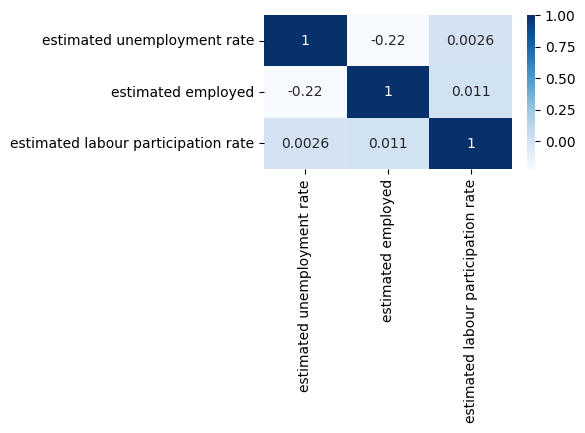

In [ ]:
plt.figure(figsize=(4,2))
sns.heatmap(df1.corr(),annot=True,cmap='Blues')
plt.show()

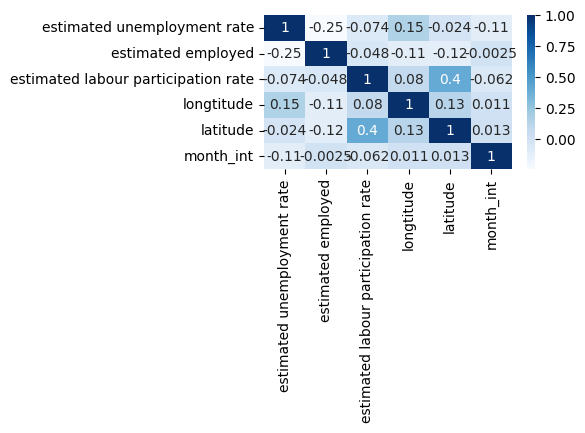

In [ ]:
plt.figure(figsize=(4,2))
sns.heatmap(ds.corr(),annot=True,cmap='Blues')
plt.show()

Top 10 states with highest unemployment in 2020

In [ ]:
ds1=ds[['state','estimated unemployment rate']].groupby('state').sum().sort_values('estimated unemployment rate', ascending=False)

In [ ]:
ds1.head(10) #2020 data

,estimated unemployment rate
state,
Haryana,274.77
Tripura,250.55
Jharkhand,195.39
Bihar,194.71
Delhi,184.14
Puducherry,179.42
Himachal Pradesh,160.65
Rajasthan,158.68
Jammu & Kashmir,148.30


Text(0, 0.5, 'Unemployment%')

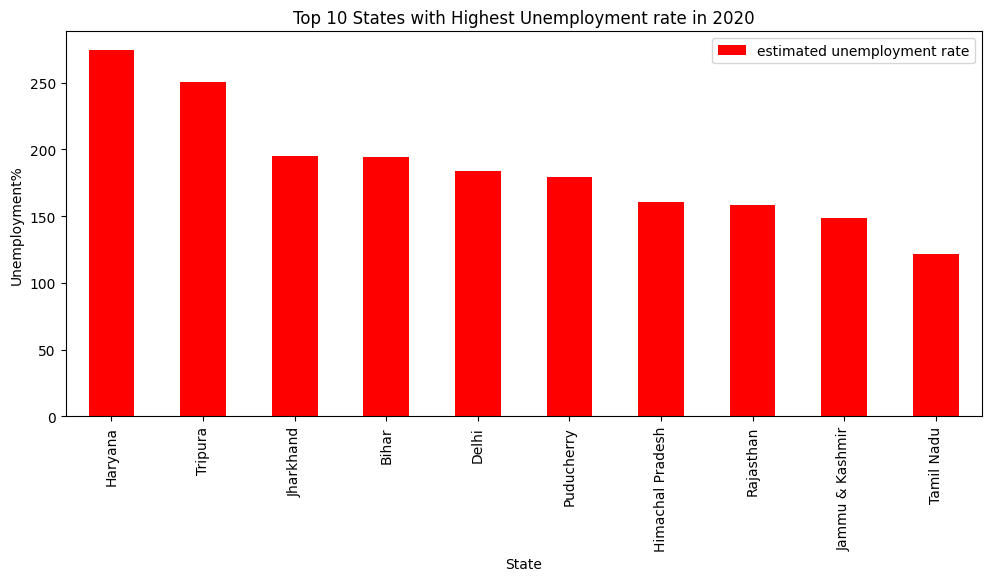

In [ ]:
fig = plt.figure()
ax0 = fig.add_subplot(1,2,1)
ds1[:10].plot(kind= 'bar', color='red', figsize=(26,5),ax=ax0)
ax0.set_title("Top 10 States with Highest Unemployment rate in 2020")
ax0.set_xlabel('State')
ax0.set_ylabel('Unemployment%')

To visualize Estimated Unemployment rate and labour participation rate in each month of 2020

In [ ]:
ds1 = ds.groupby(["month"])[['estimated unemployment rate',  "estimated labour participation rate"]].mean()
ds1 = pd.DataFrame(ds1).reset_index()

In [ ]:
month = ds1.month
unemployment_rate = ds1["estimated unemployment rate"]
labour_participation_rate = ds1["estimated labour participation rate"]

fig = go.Figure() #here, it provide core functionality for creating interactive plots n to visualize the data

fig.add_trace(go.Bar(x = month, y = unemployment_rate, name= "Unemployment Rate"))
fig.add_trace(go.Bar(x = month, y = labour_participation_rate, name= "Labour Participation Rate"))

fig.update_layout(title="Uneployment Rate and Labour Participation Rate",
                  xaxis={"categoryorder":"array", "categoryarray":["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct"]})

fig.show()

State wise Analysis

In [ ]:
ds2 = ds.groupby(["state"])[["estimated unemployment rate", "estimated employed", "estimated labour participation rate"]].mean()
ds2 = pd.DataFrame(ds2).reset_index()

In [ ]:
fig = px.box(ds2,x='state',y='estimated unemployment rate',color='state',title='Unemployment rate')
fig.update_layout(xaxis={'categoryorder':'total descending'})
fig.show()

In [ ]:
df1 = df[["state","estimated employed"]].groupby('state').sum().sort_values("estimated employed", ascending=False)
df1

,estimated employed
state,
Uttar Pradesh,786655301.0
Maharashtra,559725484.0
West Bengal,481559064.0
Bihar,346253296.0
Tamil Nadu,343547309.0
Gujarat,319256358.0
Madhya Pradesh,311233561.0
Karnataka,298679340.0
Rajasthan,281149813.0


Text(0, 0.5, 'Estimated Employee')

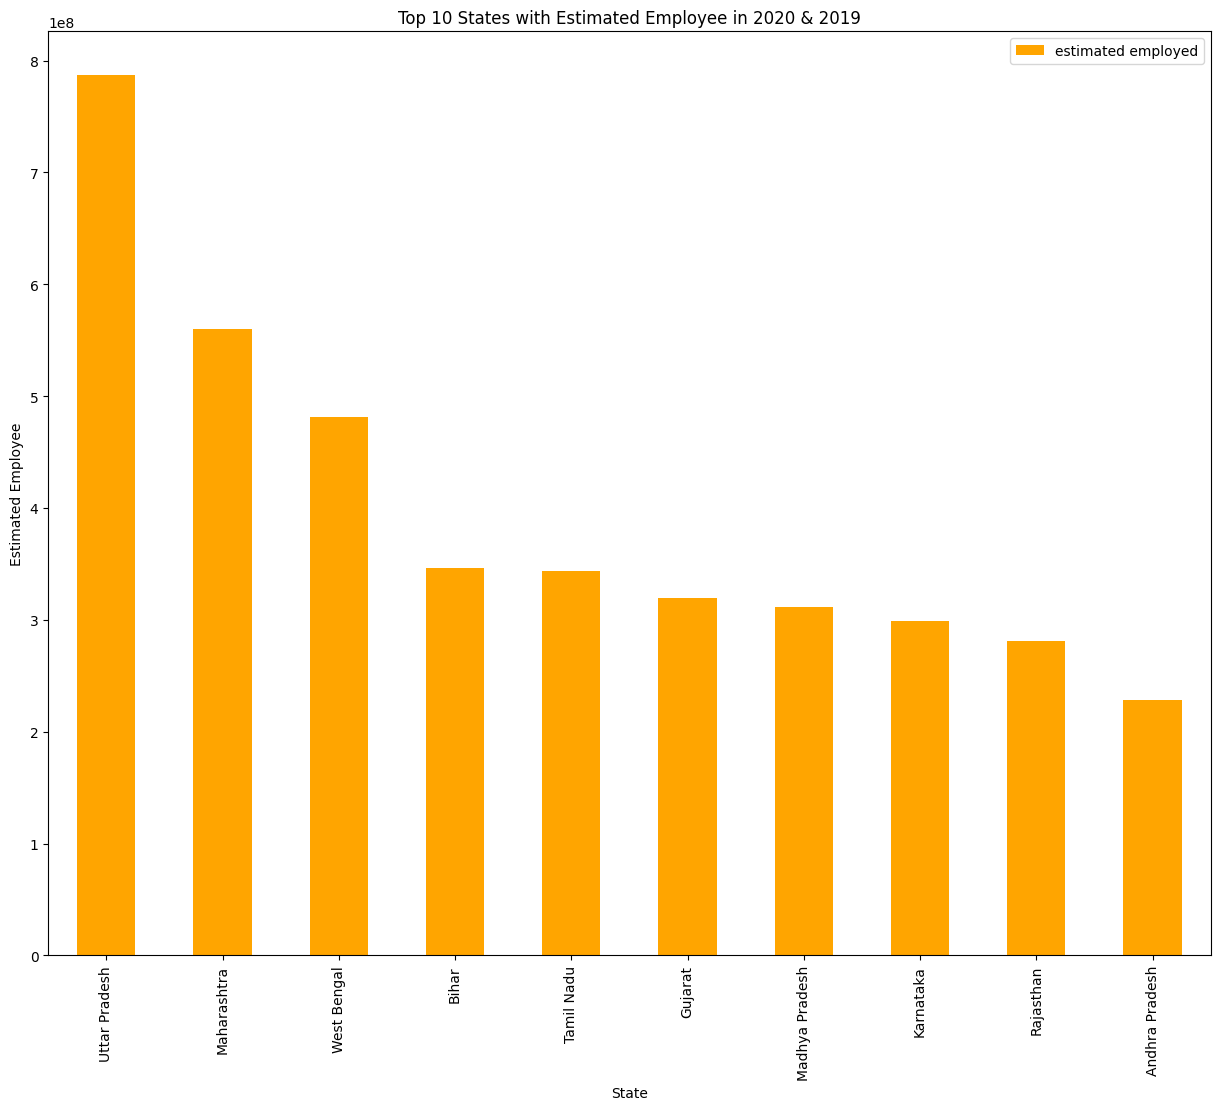

In [ ]:
df1[:10].plot(kind='bar',color='orange', figsize=(15,12))
plt.title("Top 10 States with Estimated Employee in 2020 & 2019")
plt.xlabel('State')
plt.ylabel('Estimated Employee')

In [ ]:
ds3 = ds[["state","estimated employed"]].groupby('state').sum().sort_values("estimated employed", ascending=False)
ds3

,estimated employed
state,
Uttar Pradesh,555247990
Maharashtra,392047582
West Bengal,333051643
Bihar,236068280
Gujarat,227307461
Madhya Pradesh,223183353
Tamil Nadu,219878981
Karnataka,216240176
Rajasthan,197317522


Text(0, 0.5, 'Estimated Employee')

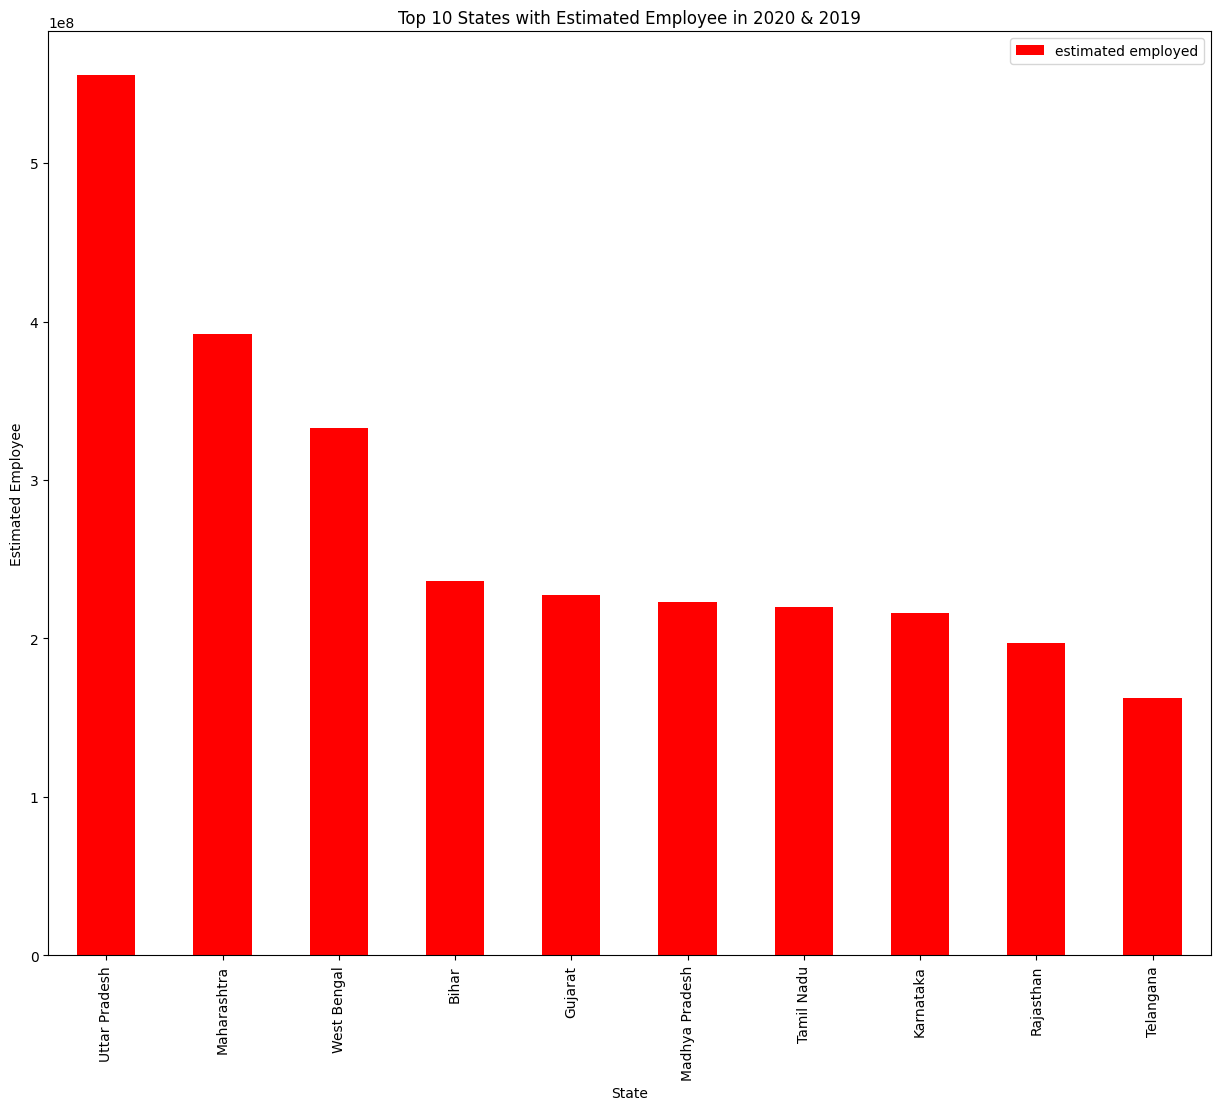

In [ ]:
ds3[:10].plot(kind='bar',color='red', figsize=(15,12))
plt.title("Top 10 States with Estimated Employee in 2020 & 2019")
plt.xlabel('State')
plt.ylabel('Estimated Employee')

Month & State wise Analysis - BAR PLOT unemployment rate in 2020

In [ ]:
fig = px.bar(ds, x='state',y='estimated unemployment rate', animation_frame = 'month', color='state',
            title='Unemployment rate from Jan 2020 to Oct 2020 (State)')

fig.update_layout(xaxis={'categoryorder':'total descending'})

fig.layout.updatemenus[0].buttons[0].args[1]["frame"]["duration"]=2000

fig.show()


Regional Analysis of data in 2020

In [ ]:
ds.region.unique()

array(['South', 'Northeast', 'East', 'West', 'North'], dtype=object)

array(['South', 'Northeast', 'East', 'West', 'North'], dtype=object)

In [ ]:
ds4 = ds.groupby(["region"])[['estimated unemployment rate', "estimated employed", "estimated labour participation rate"]].mean()
ds4 = pd.DataFrame(ds4).reset_index()

In [ ]:
fig = px.scatter_matrix(ds, dimensions=['estimated unemployment rate','estimated employed'], color='region')
fig.show()

In [ ]:
fig = px.bar(ds, x="region", y="estimated unemployment rate", color="region", title="Average Unemployment Rate in 2020 (Region)")
fig.update_layout(xaxis={'categoryorder':'total descending'})
fig.show()

In [ ]:
fig = px.bar(ds, x='region',y='estimated unemployment rate', animation_frame = 'month', color='state',
            title='Unemployment rate from Jan 2020 to Oct 2020')

fig.update_layout(xaxis={'categoryorder':'total ascending'})
fig.layout.updatemenus[0].buttons[0].args[1]["frame"]["duration"] = 1000

fig.show()